### data analysis and data preprocessing

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = pd.read_excel("merc.xlsx")

In [13]:
df = data.copy()

In [15]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [17]:
# boş gözlem birimlerinin tespiti
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

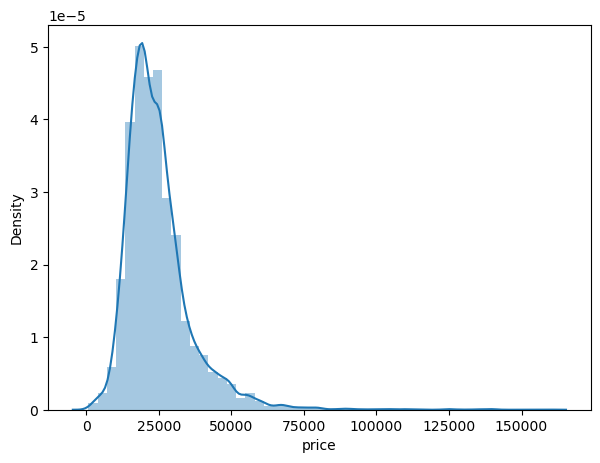

In [23]:
#fiyat dağılımı grafiği
plt.figure(figsize=(7,5))
sns.distplot(df["price"])

C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

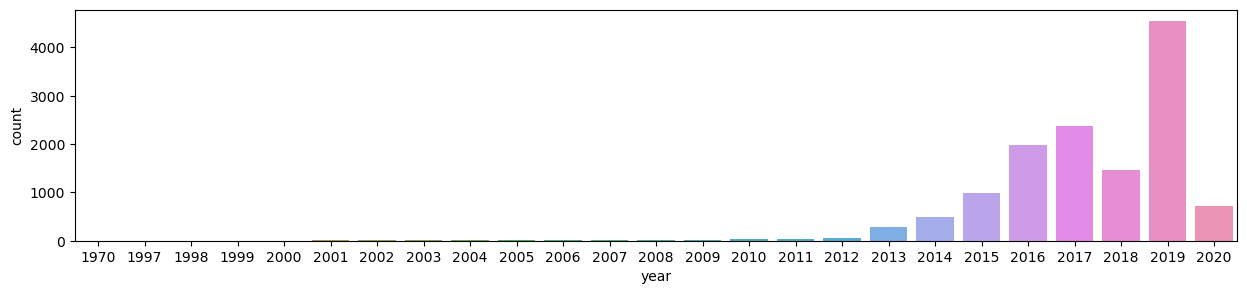

In [36]:
plt.figure(figsize=(15,3))
sns.countplot(df["year"])

In [40]:
#değişkenlerin price değişkenine olan etkisi. price correlation
df.corr()["price"].sort_values()

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='price'>

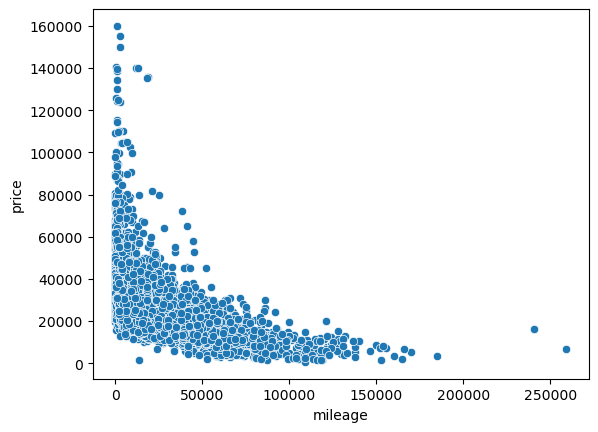

In [41]:
sns.scatterplot(x=df.mileage, y=df.price)

In [43]:
#en yüksek fiyatlı araba sıralaması
df.sort_values("price", ascending = False).head(20)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


#### Data cleansing

* Verinin ana yapısını bozan en yüksek fiyatlı verilerin temizlenmesi. (verisetindeki araçların fiyat ortalaması 24074)
* Araç model ortalamasını aşağı çeken modeli düşük arabaların temizlenmesi. (Verisetindeki araçların model ortalaması 2017.)
* Kategorik değişkenlerin düşürülmesi.

In [45]:
df.shape

(13119, 7)

In [47]:
len(df) * 0.01 # verilerin %1 

131.19

In [49]:
# SORUN 1 - verinin ana yapısını bozan %1 lik en yüksek fiyatlı verileri temizliyoruz

c_df = df.sort_values("price", ascending=False).iloc[131:]

In [50]:
c_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12988.0,2017.281876,2.228515,1970.0,2016.000,2018.0,2019.00,2020.0
price,12988.0,24074.926933,9866.224575,650.0,17357.500,22299.0,28706.00,65990.0
mileage,12988.0,22132.741146,21196.776401,1.0,6322.000,15369.5,31982.25,259000.0
tax,12988.0,129.689714,65.183076,0.0,125.000,145.0,145.00,580.0
mpg,12988.0,55.437142,15.025999,1.1,45.600,56.5,64.20,217.3
engineSize,12988.0,2.050901,0.532596,0.0,1.675,2.0,2.10,6.2


C:\Users\kerim\anaconda3\envs\project_1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

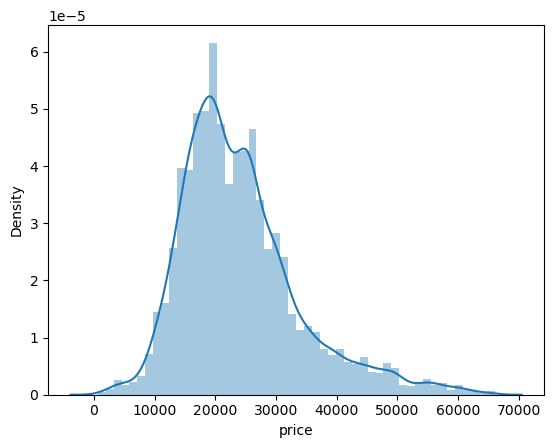

In [53]:
sns.distplot(c_df.price)

In [58]:
# SORUN 2 - modeli düşük araçların çıkarılması.
c_df.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [86]:
df = c_df
df = df[df.year != 1970]

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,12987.0,2017.285516,2.189633,1997.0,2016.0,2018.0,2019.0,2020.0
price,12987.0,24074.855779,9866.601115,650.0,17355.0,22299.0,28706.0,65990.0
mileage,12987.0,22133.367367,21197.472376,1.0,6320.0,15371.0,31986.5,259000.0
tax,12987.0,129.676215,65.167429,0.0,125.0,145.0,145.0,580.0
mpg,12987.0,55.438392,15.025902,1.1,45.6,56.5,64.2,217.3
engineSize,12987.0,2.051059,0.532313,0.0,1.7,2.0,2.1,6.2


In [89]:
#SORUN 3 - kategorik değişkenin düşürülmesi
df = df.drop("transmission", axis=1)

### Creating a model


In [92]:
y = df["price"].values
x = df.drop("price", axis=1).values

In [93]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [94]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
#test_size -> verinin %30'unun teste ayrılması
# random_state -> rastgele verilerle çalışırken bir sonraki işlemlerde de aynı verilerle çalışmak için.

In [98]:
X_train.shape

(9090, 5)

In [99]:
X_test.shape

(3897, 5)

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()


In [102]:
X_train = scaler.fit_transform(X_train)

In [103]:
X_test = scaler.transform(X_test)

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [108]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

### Model Training

In [110]:
model.fit(x= X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 250, epochs = 300)

Epoch 1/300
37/37 [==============================] - 2s 16ms/step - loss: 674377472.0000 - val_loss: 682883456.0000
Epoch 2/300
37/37 [==============================] - 0s 5ms/step - loss: 674346752.0000 - val_loss: 682829312.0000
Epoch 3/300
37/37 [==============================] - 0s 5ms/step - loss: 674244992.0000 - val_loss: 682651264.0000
Epoch 4/300
37/37 [==============================] - 0s 5ms/step - loss: 673932160.0000 - val_loss: 682131584.0000
Epoch 5/300
37/37 [==============================] - 0s 5ms/step - loss: 673091392.0000 - val_loss: 680818560.0000
Epoch 6/300
37/37 [==============================] - 0s 5ms/step - loss: 671094208.0000 - val_loss: 677843328.0000
Epoch 7/300
37/37 [==============================] - 0s 6ms/step - loss: 666847168.0000 - val_loss: 671881984.0000
Epoch 8/300
37/37 [==============================] - 0s 7ms/step - loss: 658807040.0000 - val_loss: 661073472.0000
Epoch 9/300
37/37 [==============================] - 0s 6ms/step - loss: 644895

37/37 [==============================] - 0s 2ms/step - loss: 64075528.0000 - val_loss: 66718316.0000
Epoch 73/300
37/37 [==============================] - 0s 2ms/step - loss: 63569220.0000 - val_loss: 66251436.0000
Epoch 74/300
37/37 [==============================] - 0s 2ms/step - loss: 63066628.0000 - val_loss: 65792484.0000
Epoch 75/300
37/37 [==============================] - 0s 2ms/step - loss: 62572448.0000 - val_loss: 65311464.0000
Epoch 76/300
37/37 [==============================] - 0s 2ms/step - loss: 62093644.0000 - val_loss: 64822552.0000
Epoch 77/300
37/37 [==============================] - 0s 2ms/step - loss: 61567596.0000 - val_loss: 64336568.0000
Epoch 78/300
37/37 [==============================] - 0s 2ms/step - loss: 61024432.0000 - val_loss: 63846212.0000
Epoch 79/300
37/37 [==============================] - 0s 2ms/step - loss: 60496504.0000 - val_loss: 63334256.0000
Epoch 80/300
37/37 [==============================] - 0s 2ms/step - loss: 59967940.0000 - val_loss: 6

37/37 [==============================] - 0s 2ms/step - loss: 25666302.0000 - val_loss: 28946376.0000
Epoch 144/300
37/37 [==============================] - 0s 2ms/step - loss: 25425556.0000 - val_loss: 28737982.0000
Epoch 145/300
37/37 [==============================] - 0s 2ms/step - loss: 25196708.0000 - val_loss: 28481366.0000
Epoch 146/300
37/37 [==============================] - 0s 2ms/step - loss: 25009784.0000 - val_loss: 28345800.0000
Epoch 147/300
37/37 [==============================] - 0s 2ms/step - loss: 24781556.0000 - val_loss: 28076742.0000
Epoch 148/300
37/37 [==============================] - 0s 2ms/step - loss: 24612092.0000 - val_loss: 27852562.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 24417722.0000 - val_loss: 27738366.0000
Epoch 150/300
37/37 [==============================] - 0s 2ms/step - loss: 24214210.0000 - val_loss: 27423030.0000
Epoch 151/300
37/37 [==============================] - 0s 2ms/step - loss: 23994018.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 20404196.0000 - val_loss: 22970520.0000
Epoch 215/300
37/37 [==============================] - 0s 2ms/step - loss: 20381060.0000 - val_loss: 22784486.0000
Epoch 216/300
37/37 [==============================] - 0s 2ms/step - loss: 20369952.0000 - val_loss: 22820948.0000
Epoch 217/300
37/37 [==============================] - 0s 2ms/step - loss: 20328878.0000 - val_loss: 22851952.0000
Epoch 218/300
37/37 [==============================] - 0s 2ms/step - loss: 20317512.0000 - val_loss: 22810740.0000
Epoch 219/300
37/37 [==============================] - 0s 2ms/step - loss: 20296264.0000 - val_loss: 22766304.0000
Epoch 220/300
37/37 [==============================] - 0s 2ms/step - loss: 20291636.0000 - val_loss: 22668964.0000
Epoch 221/300
37/37 [==============================] - 0s 2ms/step - loss: 20249710.0000 - val_loss: 22731852.0000
Epoch 222/300
37/37 [==============================] - 0s 2ms/step - loss: 20228424.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 19251330.0000 - val_loss: 21558468.0000
Epoch 286/300
37/37 [==============================] - 0s 2ms/step - loss: 19232130.0000 - val_loss: 21375856.0000
Epoch 287/300
37/37 [==============================] - 0s 2ms/step - loss: 19227550.0000 - val_loss: 21361516.0000
Epoch 288/300
37/37 [==============================] - 0s 2ms/step - loss: 19213062.0000 - val_loss: 21454604.0000
Epoch 289/300
37/37 [==============================] - 0s 2ms/step - loss: 19184256.0000 - val_loss: 21321632.0000
Epoch 290/300
37/37 [==============================] - 0s 2ms/step - loss: 19209520.0000 - val_loss: 21376618.0000
Epoch 291/300
37/37 [==============================] - 0s 2ms/step - loss: 19183848.0000 - val_loss: 21349108.0000
Epoch 292/300
37/37 [==============================] - 0s 2ms/step - loss: 19170604.0000 - val_loss: 21421680.0000
Epoch 293/300
37/37 [==============================] - 0s 2ms/step - loss: 19181130.0000 - val

In [114]:
loss_data = pd.DataFrame(model.history.history)

In [115]:
loss_data.head()

,loss,val_loss
0,674377472.0,682883456.0
1,674346752.0,682829312.0
2,674244992.0,682651264.0
3,673932160.0,682131584.0
4,673091392.0,680818560.0


<AxesSubplot:>

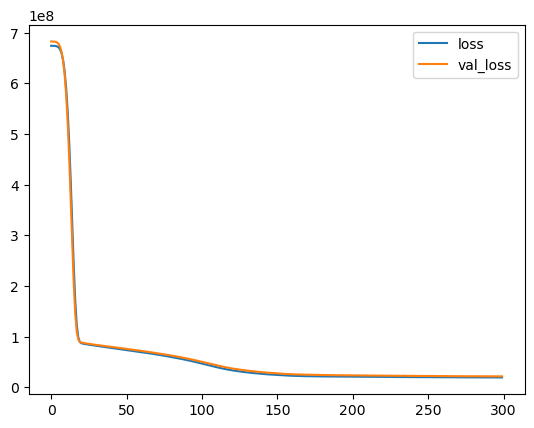

In [116]:
loss_data.plot()

In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [122]:
tahmin_dizisi = model.predict(X_test)

122/122 [==============================] - 0s 2ms/step


In [123]:
tahmin_dizisi

array([[23906.973],
       [21559.006],
       [15229.754],
       ...,
       [19954.13 ],
       [33525.934],
       [24302.66 ]], dtype=float32)

In [125]:
mean_absolute_error(y_test, tahmin_dizisi)

3261.6335165108476

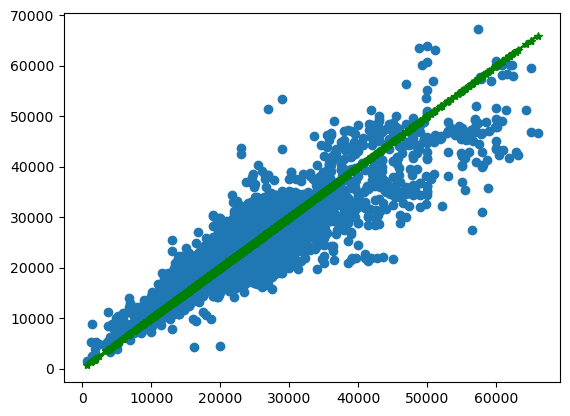

In [126]:
plt.scatter(y_test, tahmin_dizisi)
plt.plot(y_test, y_test, "g-*")

In [127]:
df.iloc[2]

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [128]:
yeniArabaSeries = df.drop("price", axis=1).iloc[2]

In [129]:
yeniArabaSeries = scaler.transform(yeniArabaSeries.values.reshape(-1,5))

In [130]:
model.predict(yeniArabaSeries)

1/1 [==============================] - 0s 29ms/step


array([[61483.598]], dtype=float32)

In [ ]:
#  gerçek fiyat:  65980.0, tahmin: 61483.598